In [1]:
library(tidyverse)
# adding LaTeX default fonts
sysfonts::font_add ("CMU Serif", "/Users/stawager/Downloads/cmu-serif/cmunrm.ttf")
sysfonts::font_add("CMU Serif Bold", "/Users/stawager/Downloads/cmu-serif/cmunbx.ttf")
sysfonts::font_add("CMU Serif Italic", "/Users/stawager/Downloads/cmu-serif/cmunti.ttf")
sysfonts::font_add("CMU Serif Italic Bold", "/Users/stawager/Downloads/cmu-serif/cmunbi.ttf")
showtext::showtext_auto()

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
df <- read.csv("results.csv")

In [3]:
glimpse(df)

Rows: 51
Columns: 5
$ zad       <int> 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, …
$ L         <int> 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10, 1…
$ iter      <int> 17260, 9401, 10539, 12456, 3225, 4574, 7147, 10419, 4145, 33…
$ time      <dbl> 1.638453e+00, 8.663709e-01, 9.919810e-01, 1.153658e+00, 3.03…
$ evolution <chr> "5045;4954;5030;5065;5143;5076;5175;5174;5123;5190;5041;4987…


In [4]:
zad1 <- df %>%
    filter(zad==1)

In [5]:
str2int <- function(v){
    return (as.integer(unlist(strsplit(v, ";"))))
}

In [6]:
zad1_evo <-str2int(zad1$evolution)

In [7]:
max1_y <- max(zad1_evo)
max1_x <- match(max1_y, zad1_evo)

max2_y <- max(zad1_evo[8000:10000])
max2_x <- match(max2_y, zad1_evo[8000:10000])+8000

min2_y <- min(zad1_evo[13000:14000])
min2_x <- match(min2_y, zad1_evo[13000:14000])+13000

min3_y <- min(zad1_evo[5000:6000])
min3_x <- match(min3_y, zad1_evo[5000:6000])+5000

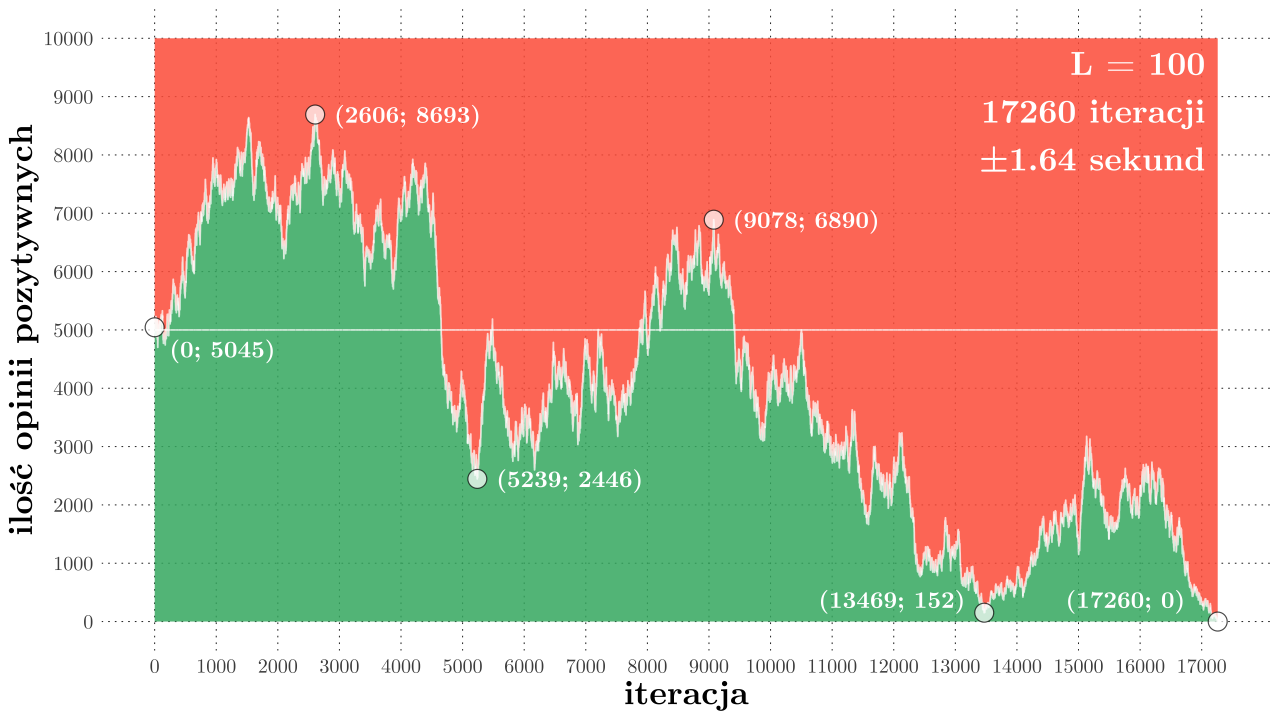

In [8]:
scale <- 1.5
options(
    repr.plot.width = 16/scale, 
    repr.plot.height = 9/scale)

# colors
goodcolor <- "mediumseagreen"
badcolor <- "tomato"

# plot
ggplot() + 
    aes(x = 1:zad1$iter, 
        y = zad1_evo) +

    # 'yes' fill
    geom_ribbon(
        aes(ymin = 0, 
            ymax = zad1_evo), 
        fill = goodcolor, 
        alpha = .85) +

    # 'no' fill
    geom_ribbon(
        aes(ymin = zad1_evo, 
            ymax = zad1$L^2),
        fill = badcolor, 
        alpha = .85) +

    # evolution line / lineplot
    geom_line(
        linewidth = .5, 
        color = "white", 
        alpha = .71) +

    # starting point
    geom_point(
        aes(x = 0, 
            y = zad1_evo[1]), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = 0+1100, 
        y = zad1_evo[1]-375, 
        label = glue::glue("(0; {zad1_evo[1]})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # end point
    geom_point(
        aes(x = zad1$iter, 
            y = tail(zad1_evo, 1)), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = zad1$iter-1500, 
        y = tail(zad1_evo, 1)+375, 
        label = glue::glue("({zad1$iter}; {tail(zad1_evo, 1)})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # max1 point
    geom_point(
        aes(x = max1_x, 
            y = max1_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = max1_x+1500, 
        y = max1_y, 
        label = glue::glue("({max1_x}; {max1_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # max2 point
    geom_point(
        aes(x = max2_x, 
            y = max2_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = max2_x+1500, 
        y = max2_y, 
        label = glue::glue("({max2_x}; {max2_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # 2nd lowest point
    geom_point(
        aes(x = min2_x, 
            y = min2_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = min2_x-1500, 
        y = 375, 
        label = glue::glue("({min2_x}; {min2_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +

    # 3rd lowest point
    geom_point(
        aes(x = min3_x, 
            y = min3_y), 
        color = "black", 
        fill = "white",
        alpha = .71, 
        size = 5,
        shape = 21) +
    annotate(
        "text", 
        x = min3_x+1500, 
        y = min3_y, 
        label = glue::glue("({min3_x}; {min3_y})"),
        color = "white", 
        size = 5, 
        family = "CMU Serif Bold") +
    
    # top right corner specs
     annotate(
        "text", 
        x = zad1$iter-200, 
        y = zad1$L^2-1250,
        label = glue::glue("L = {zad1$L}\n{zad1$iter} iteracji\n±{round(zad1$time, 2)} sekund"),
        color = "white", 
        size = 7, 
        family = "CMU Serif Bold",
        hjust = 1) +

    # 50% line
    geom_line(
        aes(x = 1:zad1$iter, 
            y = zad1$L^2/2), 
        alpha = .71,
        color = "white") +

    # styling    
    theme_minimal() +
    labs(
        x = "iteracja", 
        y = "ilość opinii pozytywnych") +
    scale_y_continuous(
        breaks = seq(0, zad1$L^2, by = 1000), 
        limits = c(0, NA)) +
    scale_x_continuous(
        breaks = seq(0, zad1$iter, by = 1000)) +
    theme( 
        text = element_text(family = "CMU Serif"),
        axis.text = element_text(size=12),
        axis.title = element_text(size = 20, family = "CMU Serif Bold"),
        axis.title.y.right = element_text(color = badcolor),
        panel.grid = element_line(linetype = "dotted", linewidth = 0.25, color = "black"),
        panel.grid.minor = element_blank())

___

In [9]:
zad2 <- df %>%
    filter(zad == 2)

zad3_10 <- df %>%
    filter(zad == 3, L == 10)

zad3_50 <- df %>%
    filter(zad == 3, L == 50)

zad3_100 <- df %>%
    filter(zad == 3, L == 100)

zad3_200 <- df %>%
    filter(zad == 3, L == 200)

In [10]:
# Podstawowy wykres
show_plot_and_stats <- function(data){
  
  p <- ggplot() + theme_minimal()
  for (i in 1:10) {
    evolution_i <- as.numeric(strsplit(data$evolution[i], ";")[[1]])
    iter_i <- 1:length(evolution_i)
    df_i <- data.frame(iter = iter_i, y = evolution_i, line_id = i)
    
    p <- p + geom_line(data = df_i, aes(x = iter, y = y, color = factor(line_id)), linewidth=1, alpha = .5)
  }

  p <- p + labs(title = "Evolution , L=100, n=10", x = "Iteration", y = "'yes' value", color = "Line ID")
  print(p)

  cat(data$iter)
  as.table(summary(data[, 3:4]))
}

85 13 37 17 12 26 51 26 36 42

      iter            time          
 Min.   :12.00   Min.   :1.311e-05  
 1st Qu.:19.25   1st Qu.:2.110e-05  
 Median :31.00   Median :3.350e-05  
 Mean   :34.50   Mean   :3.779e-05  
 3rd Qu.:40.75   3rd Qu.:4.476e-05  
 Max.   :85.00   Max.   :9.489e-05  

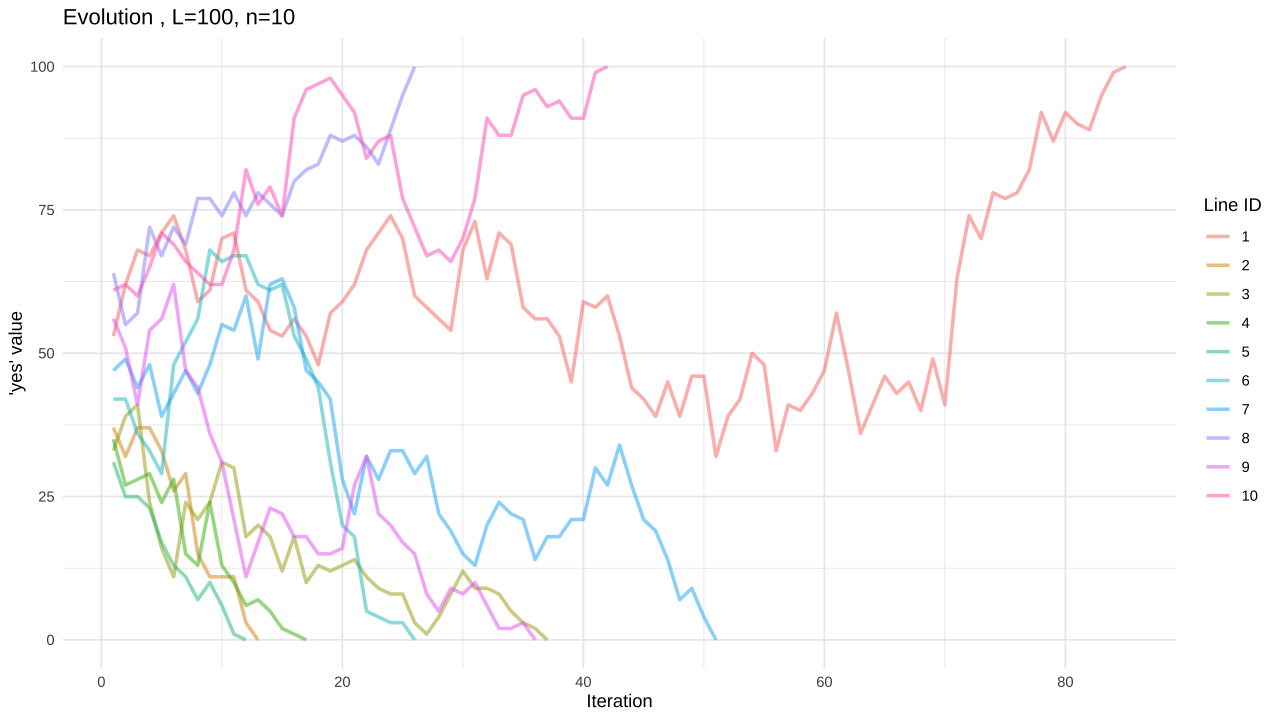

In [11]:
show_plot_and_stats(zad3_10)

3475 3086 1545 3158 1214 782 2551 1277 1623 2532

      iter           time        
 Min.   : 782   Min.   :0.01840  
 1st Qu.:1344   1st Qu.:0.03848  
 Median :2078   Median :0.04933  
 Mean   :2124   Mean   :0.05615  
 3rd Qu.:2952   3rd Qu.:0.07693  
 Max.   :3475   Max.   :0.10616  

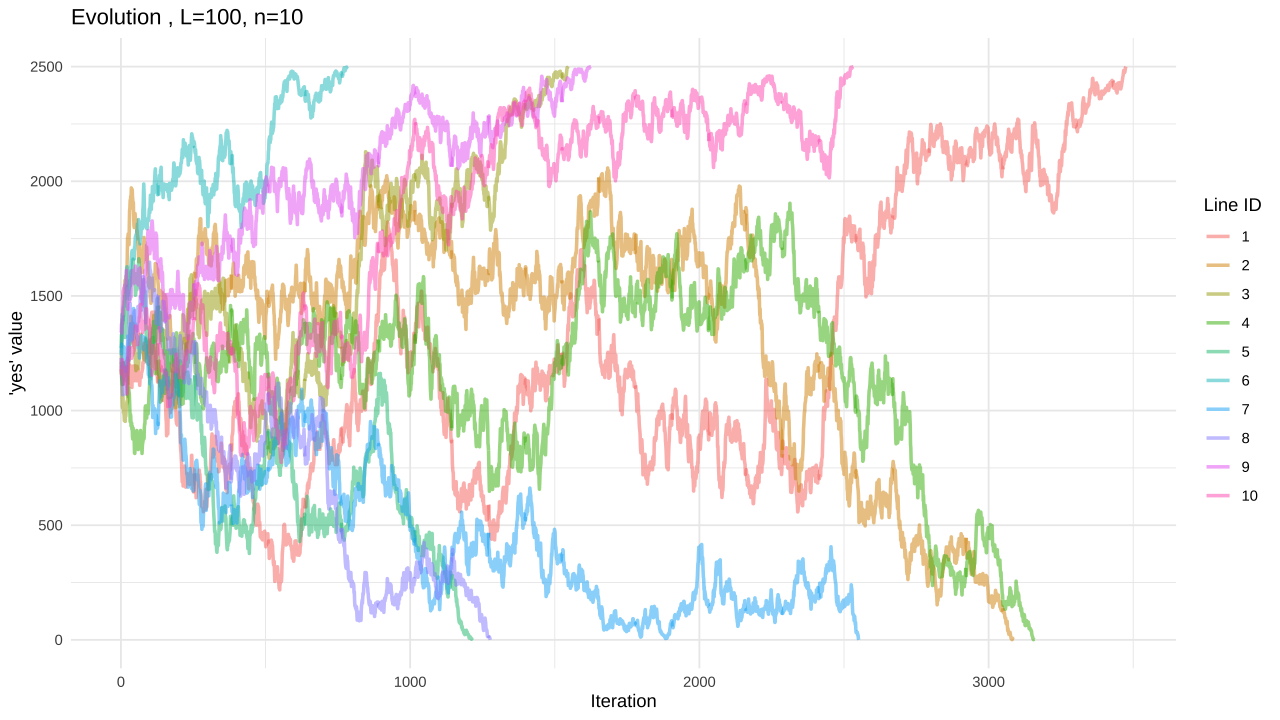

In [12]:
show_plot_and_stats(zad3_50)

9401 10539 12456 3225 4574 7147 10419 4145 3364 1794

      iter            time       
 Min.   : 1794   Min.   :0.1715  
 1st Qu.: 3559   1st Qu.:0.3454  
 Median : 5860   Median :0.5486  
 Mean   : 6706   Mean   :0.6285  
 3rd Qu.:10164   3rd Qu.:0.9481  
 Max.   :12456   Max.   :1.1537  

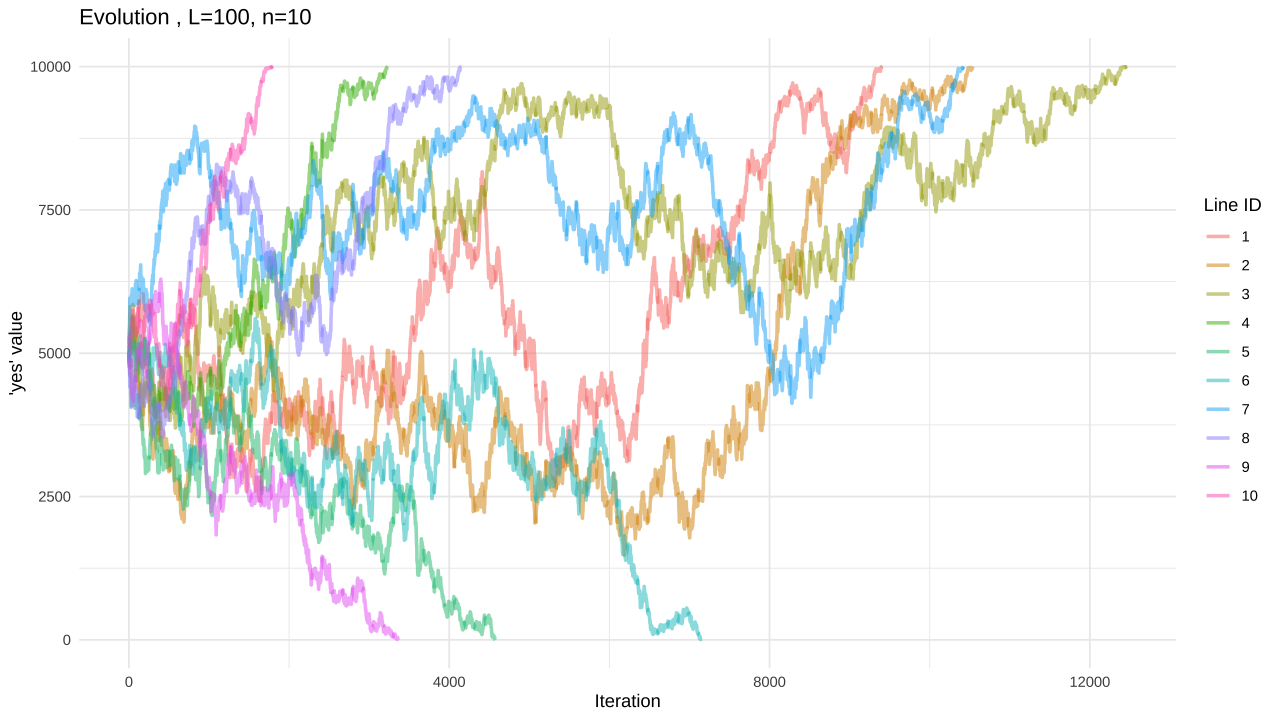

In [13]:
show_plot_and_stats(zad2)

69385 46391 41167 52797 21541 41574 55731 45549 19684 37442

      iter            time       
 Min.   :19684   Min.   : 7.655  
 1st Qu.:38373   1st Qu.:15.060  
 Median :43562   Median :16.991  
 Mean   :43126   Mean   :16.842  
 3rd Qu.:51196   3rd Qu.:19.815  
 Max.   :69385   Max.   :27.527  

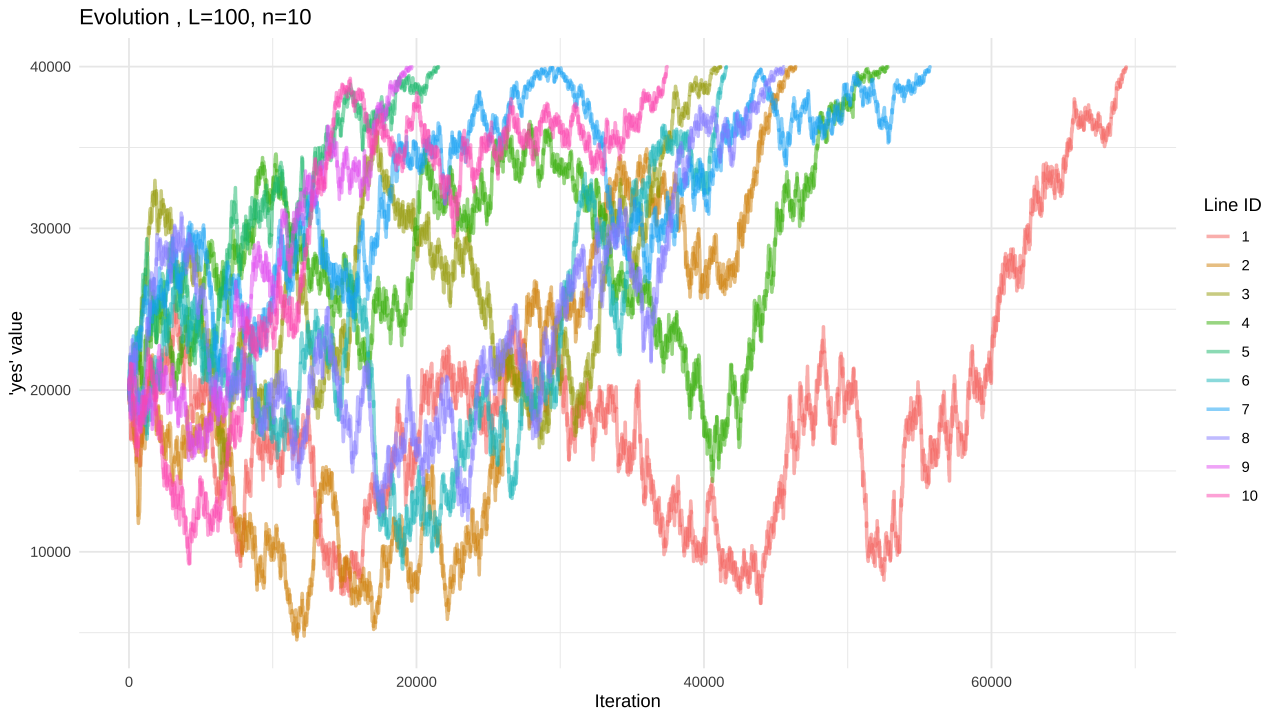

In [14]:
show_plot_and_stats(zad3_200)